#Activation Function

https://en.wikipedia.org/wiki/Activation_function

**[Wiki]** The activation function of a node defines the output of that node given an input or set of inputs. Nonlinear activation functions allow neural networks to compute nontrivial problems using only a small number of nodes, and such activation functions are called nonlinearities.


**[Note]** Without nonlinear activation function, a multi-layer nerual network can be presented as a single-layer nerual network. A layer can be denoted as $Act(W \times X)$, and a two layer NN can be denoted as $Act_2(W_2 \times Act_1(W_1 \times X))$. Without the activation function $Act()$, it can be denoted as $W_2 \times W_1 \times X = W \times X$, which is a single layer NN. 

### Sigmoid

Sigmoid function can be viewed as a soft version of a step function (a step function is not differentiable thus backpropagation does not work). Sigmoid can transform from 1.0 to 0.0 smoothly.

sigmoid: $f(x) = \frac{1}{1+e^{-x}}$

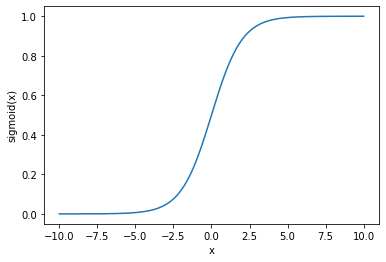

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = 1/(1+np.power(np.e, -x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

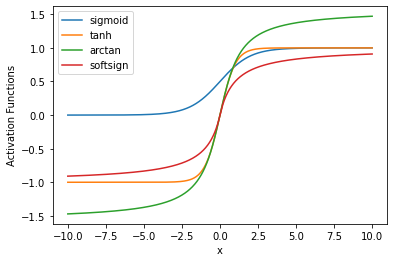

In [ ]:
plt.plot(x, 1/(1+np.power(np.e, -x)), label ="sigmoid")
plt.plot(x, (np.power(np.e, x)-np.power(np.e, -x))/(np.power(np.e, x)+np.power(np.e, -x)),label ="tanh")
plt.plot(x, np.arctan(x), label ="arctan")
plt.plot(x, x/(1+np.abs(x)), label ="softsign")

plt.xlabel('x')
plt.ylabel('Activation Functions')
plt.legend()
plt.show()

**[Question]** Why tanh (hyperbolic tangent) is better than sigmoid?

(1) The output of tanh is similar to the input near zero point, i.e., $tanh(x) \approx x$. That is, the informaiton near zero point will pass to the next layer; other information will be compressed.

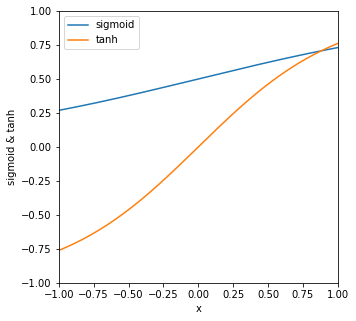

In [ ]:
plt.figure(figsize=(5,5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.plot(x, 1/(1+np.power(np.e, -x)), label ="sigmoid")
plt.plot(x, (np.power(np.e, x)-np.power(np.e, -x))/(np.power(np.e, x)+np.power(np.e, -x)), label ="tanh")

plt.xlabel('x')
plt.ylabel('sigmoid & tanh')
plt.legend()
plt.show()

**[Question]** Why tanh (hyperbolic tangent) is better than sigmoid?

(2) To avoid gradient descent vanishing. The maximun derivative of sigmoid is 0.25.

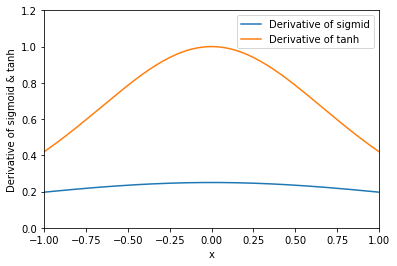

In [ ]:
plt.ylim(0, 1.2)
plt.xlim(-1, 1)

# https://en.wikipedia.org/wiki/Activation_function
plt.plot(x, 1/(1+np.power(np.e, -x)) * (1- 1/(1+np.power(np.e, -x))), label ="Derivative of sigmid")
plt.plot(x, 1- np.power((np.power(np.e, x)-np.power(np.e, -x))/(np.power(np.e, x)+np.power(np.e, -x)),2), label ="Derivative of tanh")

plt.xlabel('x')
plt.ylabel('Derivative of sigmoid & tanh')
plt.legend()
plt.show()

### ReLU (Rectified Linear Unit)

ReLU can somehow avoid gradient descent vanishing problem, bacasue at least it guarrentees the derivative is not close to zero when $x>0$. However, half of the derivative is zero which may cause dead neuron. This makes it impossible for that neuron to update it's weight as the derivatives for those respective weights would be very small or zero. Therefore, it takes no role in discriminating between inputs.


**[Note]** Leaky ReLUs with a small positive gradient for negative inputs are one attempt to address this issue and give a chance to recover. The sigmoid and tanh neurons can suffer from similar problems as their values saturate, but there is always at least a small gradient allowing them to recover in the long term.


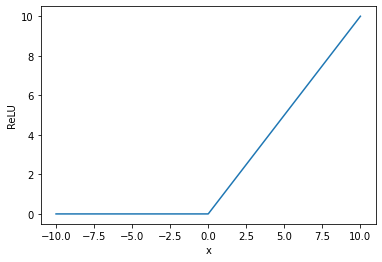

In [ ]:
x = np.linspace(-10, 10, 1000)
y = [i if i >=0 else 0 for i in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU')
plt.show()

[Note] Softplus and ELU are both differentiable near zero point. SELU guarantees the output is $N(0, 1)$, if the input is $N(0, 1)$.

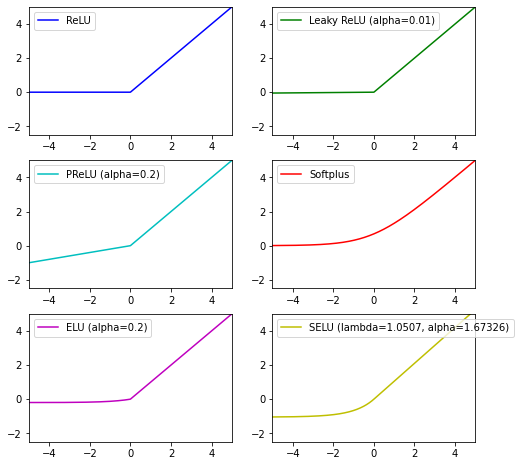

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

axs[0, 0].plot(x, [i if i >0 else 0 for i in x], 'b', label ="ReLU",)
axs[0, 1].plot(x, [i if i >0 else 0.01*i for i in x], 'g', label ="Leaky ReLU (alpha=0.01)")
axs[1, 0].plot(x, [i if i >0 else 0.2*i for i in x], 'c', label ="PReLU (alpha=0.2)")
axs[1, 1].plot(x, np.log(1+np.power(np.e, x)), 'r', label ="Softplus")
axs[2, 0].plot(x, [i if i >0 else 0.2*(np.power(np.e, i)-1) for i in x], 'm', label ="ELU (alpha=0.2)")
axs[2, 1].plot(x, [1.0507*i if i >0 else 1.0507*(np.power(np.e, i)-1) for i in x], 'y', label ="SELU (lambda=1.0507, alpha=1.67326)")

for ax in axs.flat:
    ax.set_xlim([-5, 5])
    ax.set_ylim([-2.5, 5])
    ax.legend(loc=2)

plt.show()

### Data Transform

In [ ]:
import matplotlib 

max_colors = 16
color_number = 0

norm = matplotlib.colors.Normalize(vmin=0, vmax=max_colors)
cmap = matplotlib.cm.get_cmap('jet')

def restart_colors():
    global color_number
    color_number = 0

def next_color():
    global color_number
    color_number += 1
    color = cmap(norm(color_number % max_colors))
    return color

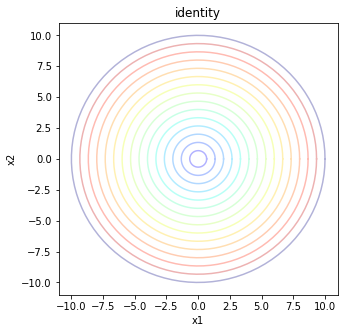

In [ ]:
def ident(x):
  return x

theta = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(1, figsize=(5,5))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

def plotting(ax, func, lab='', lim=11):
  ax.set_xlim([-1*lim, lim])
  ax.set_ylim([-1*lim, lim])
  ax.set_title(lab)
  for r in np.linspace(0, 10, 16):
    x1 = func(r*np.cos(theta))
    x2 = func(r*np.sin(theta)) 
    ax.plot(x1, x2, color= next_color(), alpha=0.3)
  return ax

ax = plotting(ax, ident, 'identity')
plt.show()

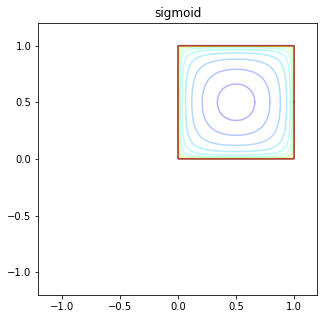

In [ ]:
def sig(x):
  return 1/(1+np.power(np.e, -x))

restart_colors()
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plotting(ax, sig, 'sigmoid', 1.2)
plt.show()

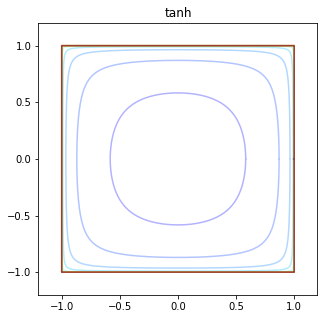

In [ ]:
def tanh(x):
  return (np.power(np.e, x)-np.power(np.e, -x))/(np.power(np.e, x)+np.power(np.e, -x))

restart_colors()
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plotting(ax, tanh, 'tanh', 1.2)
plt.show()

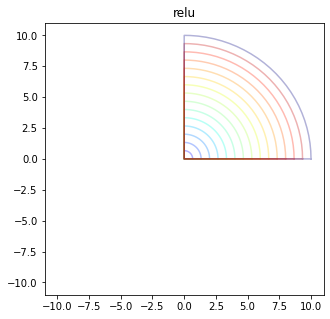

In [ ]:
def relu(x):
  return [i if i >0 else 0 for i in x]

restart_colors()
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plotting(ax, relu, 'relu')
plt.show()

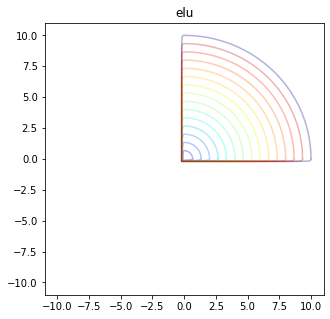

In [ ]:
def elu(x):
  return [i if i >0 else 0.2*(np.power(np.e, i)-1) for i in x]

restart_colors()
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plotting(ax, elu, 'elu')
plt.show()

### Classification

In [ ]:
rx = np.random.random(100)
ry = np.random.random(100)

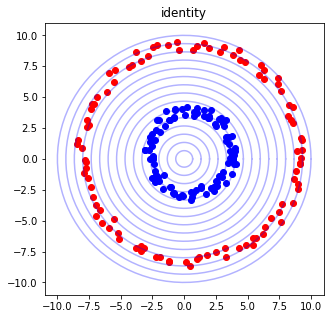

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

def plottingDots(ax, func, lab='', lim=11):
  ax.set_xlim([-1*lim, lim])
  ax.set_ylim([-1*lim, lim])
  ax.set_title(lab)
  for r in np.linspace(0, 10, 16):
    x1 = func(r*np.cos(theta))
    x2 = func(r*np.sin(theta))  
    ax.plot(x1, x2, 'b', alpha=0.3)
    if 8 < r < 9:
      ax.scatter(x1+rx, x2+ry, c='r')
    elif 3 < r < 4:
      ax.scatter(x1+rx, x2+ry, c='b')
  return ax

ax = plottingDots(ax, ident, 'identity')
plt.show()

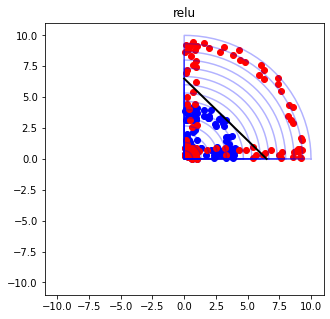

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plottingDots(ax, relu, 'relu')
cls = np.linspace(0, 6.5, 100)
ax.plot(cls, -cls+6.5, 'k', linewidth = 2)
plt.show()

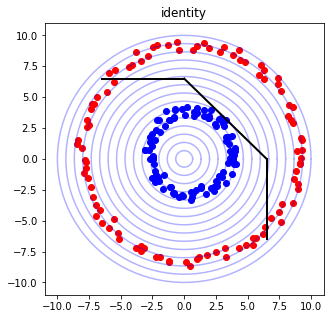

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax = plottingDots(ax, ident, 'identity')
ax.plot(cls, -cls+6.5, 'k', linewidth = 2)
ax.plot(cls*0+6.5, -cls, 'k', linewidth = 2)
ax.plot(-cls, cls*0+6.5, 'k', linewidth = 2)
plt.show()

###Neural Network



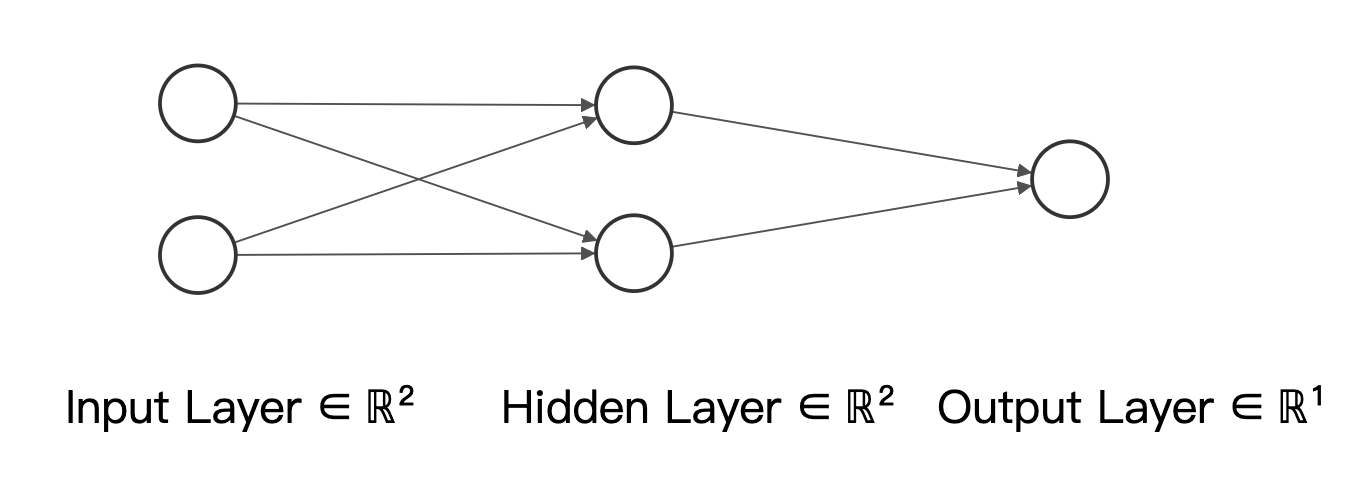

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
# make data, 200 points, 100 reds, 100 blues

rx = np.random.random(100)
ry = np.random.random(100)
th = np.linspace(0, 2*np.pi, 100)

train_data = []
target = []
for r in [3.5, 7.5]:
  x1 = r*np.cos(th) + rx # +random noise
  x2 = r*np.sin(th) + ry # +random noise
  if 3 < r < 4:
    # blue points, y = 1
    train_data.extend([(x[0], x[1]) for x in zip(x1, x2)])
    target.extend([1]*100)
  elif 7 < r < 8:
    # red points, y = 0
    train_data.extend([(x[0], x[1]) for x in zip(x1, x2)])
    target.extend([0]*100)

In [ ]:
import pandas as pd
_df = pd.DataFrame(train_data, columns=['x1','x2'])
_df['y'] = target

In [ ]:
_df

,x1,x2,y
0,3.829319,0.291786,1
1,3.793037,0.734106,1
2,4.250162,0.745356,1
3,4.360379,1.016614,1
4,3.451836,1.592448,1
...,...,...,...
195,7.670925,-1.464170,0
196,7.369657,-0.563653,0
197,8.060180,-0.404262,0
198,8.070656,0.280893,0


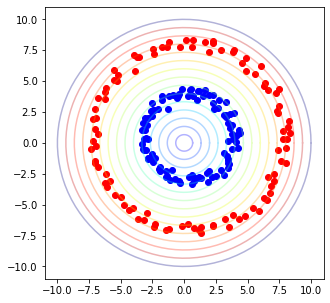

In [ ]:
restart_colors()

fig, ax = plt.subplots(1, figsize=(5,5))
ax.set_xlim([-11, 11])
ax.set_ylim([-11, 11])
for r in np.linspace(0, 10, 16):
    _x1 = r*np.cos(th)
    _x2 = r*np.sin(th)
    ax.plot(_x1, _x2, color = next_color(), alpha=0.3)
ax.scatter(_df[_df.y==1].x1, _df[_df.y==1].x2, c='b')
ax.scatter(_df[_df.y==0].x1, _df[_df.y==0].x2, c='r')
plt.show()

You may try to modify the model below (e.g., changing the # of neurons in first_layer, adding more layers, changing 'relu' activation function to 'tanh', ...) to see the different impacts to the model.

Note that for the latter visualization, do not change the 'last_layer' and the 'softmax' layer. Since the last_layer has only two neurons, we can plot the last_layer latent space by 'intermediate_layer_model' easily. The last 'softmax' layer can be viewed as a simple boundary line to classify the input data.

In [ ]:
model = tf.keras.Sequential([layers.InputLayer( input_shape = (2,), name = 'input_layer'),
                             layers.Dense(30, 'relu', name = "first_layer"),
                             #layers.Dense(2, 'relu', name = "sec"),
                             #layers.Dense(50, 'relu'),
                             layers.Dense(units = 2, activation = 'relu', name = 'last_layer'),
                             layers.Softmax(name = "softmax"),
                             ])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.get_layer('last_layer').output)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 30)                90        
_________________________________________________________________
last_layer (Dense)           (None, 2)                 62        
_________________________________________________________________
softmax (Softmax)            (None, 2)                 0         
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


Note that the cell below can be run multiple time manually, so the model will be trained (i.e., fit()) many times to find weights with lower loss function value. I suggest repreatly running the cell below until the output accuracy is lager than 0.8, so that we can visualized the result in a better way.

In [ ]:
X = _df[['x1','x2']].values
Y = _df['y'].values

history = model.fit(x = X, y = Y, verbose = 0 , batch_size = 200, epochs = 100)
print("current accuracy", history.history['accuracy'][-1])

current accuracy 1.0


In [ ]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[ 6.1852034e-02,  3.0579343e-01,  3.3585867e-01, -1.8614043e-01,
        -4.6670893e-01,  1.8602200e-01, -2.9081813e-01,  1.6699162e-01,
        -3.8654113e-01, -2.1931693e-01,  3.0602786e-01,  2.8046262e-01,
         3.6044577e-01,  1.2949392e-01,  4.5991901e-01,  3.7497780e-01,
        -4.1664460e-01,  1.0235310e-02,  3.8720414e-01, -2.3651469e-01,
         1.7771859e-01, -2.7445292e-01,  1.4240412e-01,  2.9279256e-01,
        -4.8096049e-01, -2.6565626e-01,  3.1723049e-01,  2.6403540e-01,
        -7.2919957e-02,  2.5193518e-01],
       [ 1.6657015e-02,  3.4221920e-01,  2.8103247e-01,  7.5772867e-02,
         4.0018582e-01, -1.9102491e-01, -5.2281302e-01,  1.7406252e-01,
         2.6930627e-01, -1.8437973e-01, -3.9068034e-01, -1.9512422e-01,
         3.3291629e-01, -2.8395221e-01, -2.9478643e-02, -1.5928739e-01,
        -2.8530976e-01, -5.1734708e-02,  5.0222404e-02, -4.6381238e-01,
         2.1230046e-01,  1.1215389e-01, -6.1108792e-01, -3.2219413e-01,
        -2.8636423e-01

In [ ]:
print("first 2 data points:", X[:2])
print("first 2 predictions:", model.predict(X[:2]))
print("first 2 targets:", Y[:2])

first 2 data points: [[3.82931918 0.29178587]
 [3.79303653 0.73410551]]
first 2 predictions: [[0.17273702 0.827263  ]
 [0.18185577 0.81814426]]
first 2 targets: [1 1]


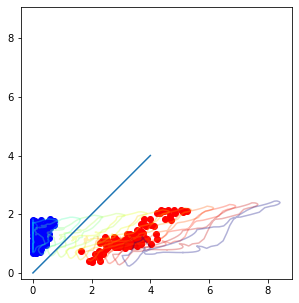

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

# circle
possible_boundary_li = []
restart_colors()
for r in np.linspace(0, 10, 16):
    _x1 = r*np.cos(th)
    _x2 = r*np.sin(th)
    _X = [[p1, p2] for p1, p2 in zip(_x1, _x2)]
    _p = intermediate_layer_model.predict(_X)
    ax.plot(_p[:,0], _p[:,1], color= next_color(), alpha=0.3)

# original points
# red
r_X = _df[_df.y==0][['x1','x2']].values
r_P = intermediate_layer_model.predict(r_X)
ax.scatter(r_P[:,0], r_P[:,1], c='r')
# blue
b_X = _df[_df.y==1][['x1','x2']].values
b_P = intermediate_layer_model.predict(b_X)
ax.scatter(b_P[:,0], b_P[:,1], c='b')

# softmax line
ax.plot(np.linspace(0, 4, 100), np.linspace(0, 4, 100));

plt.axis('square')
plt.show()

The above figure is the latent space outputted at the 'last_layer'. Since this layer has only two neurons, we can simply plot the data points. You can see that the 'circles' in the original space has been 'twisted' to an 'optimized' way (so that the loss function value would be low).

The more weights, neurons, layers, actication functions have been applied to the original space; the more 'twisted' the latent space it would be. But it is an art to design a neural network, and the effectiveness of a neural network also depends on the the distribution of the original data. It is not necessary to have a better result for a complex network.

Since the last layer is a 'softmax' and we have only two neruons in the 'last_layer', softmax will select the larger value outputted from these two neurons as the outputted class. We can simple draw a $y=x$ boundary line in the latent space; data points in one side will output 'class 1' and data points in the other side will output 'class 2'. 

You may use a normal 'dense' layer in the last layer, then the slope and the intercept of the  boundary line (or boundary surface) would be the weights of the last layer. And of course, you can still apply an activation function at the last layer.

In [ ]:
# create a mesh to plot in
x_min, x_max = -11, 11
y_min, y_max = -11, 11
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,0].reshape(xx.shape) # only use x value

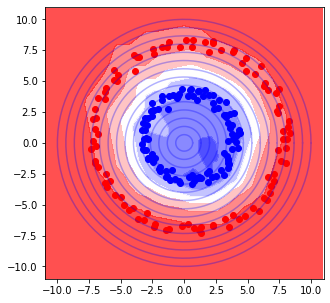

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.set_xlim([-11, 11])
ax.set_ylim([-11, 11])
for r in np.linspace(0, 10, 16):
    _x1 = r*np.cos(th)
    _x2 = r*np.sin(th)
    ax.plot(_x1, _x2, 'b', alpha=0.3)
ax.contourf(xx, yy, Z, cmap = plt.cm.bwr, alpha = 0.8) # boundary is 'white'
ax.scatter(_df[_df.y==1].x1, _df[_df.y==1].x2, c='b')
ax.scatter(_df[_df.y==0].x1, _df[_df.y==0].x2, c='r')
plt.show()

Since the boundary line is $x=y$ in the latent space, I would like to know how the boundary line looks like in the original space.

I create a mesh (lost of points on grid) in the original space, and map (i.e., predict()) the mesh points to the latent space. If the coordinate of the mesh points close to $x=y$ in the latent space, the their color are white (but I only use $x$ value to determine how close the point is.). You can see the white boundary line that can seprate these two sets of data.